# Strat1
1. If average z-score is high compared to BTC
2. If currently in an uptrend (macro)
3. Is on uptrend (daily)
4. Current uptrend average volume is less than previous uptrend
5. Buy on get_daily_vol's downtick

In [1]:
from binance.client import Client
from downloader import Downloader
import matplotlib.pyplot as plt
dl = Downloader()
import pandas as pd
import time
from datetime import datetime
import numpy as np
import statsmodels.formula.api as sm
import math
import metalabeller as ml

In [83]:
df = dl.get_working_data("ATOMUSDT")
dfbtc = dl.get_working_data("BTCUSDT")

In [76]:
def trends(df):
    ind = df.open.diff()
    ind.loc[ind>0] = 1
    ind.loc[ind<=0] = -1
    ind.iloc[0]=-1
    return ind

In [77]:
df1 = df.resample('18H').agg({'open': 'first', 
                        'high': 'max', 
                        'low': 'min', 
                        'close': 'last',
                        'volume':'sum'})
df2 = df.resample('4H').agg({'open': 'first', 
                        'high': 'max', 
                        'low': 'min', 
                        'close': 'last',
                        'volume':'sum'})

In [128]:
df1["trend"] = trends(df1)
df2["trend"] = trends(df2)

In [151]:
df1_ = df1.index.searchsorted(t_events)-1
li = l.index
df2_ = df2.index.searchsorted(t_events)-1
si = s.index
side = []
for i in range(len(t_events)):
    if df1.loc[li[df1_[i]]].trend == 1:
        if (df2.loc[si[df2_[i]]].trend == -1): 
            if (df1.loc[li[df1_[i]]].volume < df1.loc[li[df1_[i]-1]].volume):
                side.append(1)
            else: side.append(0)
        else: side.append(0)
#     elif l[dfl_[i]] == -1:
#         if s[dfs_[i]] == 1: side.append(-1)
#         else: side.append(0)
    else: side.append(0)
side = pd.Series(side, index=t_events)

In [6]:
df.open.diff()

timestamp
2019-04-29 00:00:00      NaN
2019-04-29 18:00:00   -0.938
2019-04-30 12:00:00    0.062
2019-05-01 06:00:00    0.297
2019-05-02 00:00:00    0.215
                       ...  
2021-10-16 12:00:00    1.190
2021-10-17 06:00:00   -0.750
2021-10-18 00:00:00   -1.110
2021-10-18 18:00:00   -1.000
2021-10-19 12:00:00    2.530
Freq: 18H, Name: open, Length: 1207, dtype: float64

In [8]:
for i in df.open.diff()[:5]:
    print(i)

nan
-0.9379999999999997
0.06199999999999983
0.29700000000000015
0.21499999999999986


## Template

In [ ]:
df = df.resample('1H').agg({'open': 'first', 
                        'high': 'max', 
                        'low': 'min', 
                        'close': 'last',
                        'volume':'sum'})

In [31]:
vol = ml.get_daily_vol(df.open)
t_events = ml.get_t_events(df.open, vol, 0.02)
t1 = ml.get_vertical_barrier(df.open, t_events, 2)

verify that get_vertical_barrier works as expected, use above code
remove above remove duplicates code with BTC data and see if it works


In [ ]:
side = pd.Series(np.random.randint(-1, 2, len(t_events)), index=t_events)

In [154]:
ptsl = [1,1]
min_ret = 0.00
    
events = ml.get_events(df.open,t_events,ptsl,vol,min_ret,1,t1=t1,side=side)
labels = ml.get_bins(events, df.open, t1)

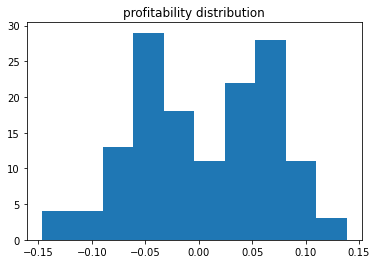

In [155]:
labels = labels[labels.ret != 0]
fig, ax = plt.subplots()
ax.set_title('profitability distribution')
ax.hist(labels.ret)
plt.show()

In [82]:
labels.ret.mean()

0.0034406470942478827

In [ ]:
new = pd.to_numeric(events.t1-events.index)/86400000000000
new.hist()